# Aula 14 - Combinação de variáveis aleatórias

Sejam $X$ e $Y$ variáveis aleatórias. O que significa fazer $Z = X + Y$ ?

Vamos criar um experimento. Sejam:

$X \sim Uniforme(4,7)$

e 

$Y \sim Exp(\mu=3)$

Inicialmente realizaremos o plot de ambas as distribuições


In [1]:
import numpy as np
from scipy.stats import uniform, expon
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Vamos criar uma faixa no eixo x, válida para ambas
eixo_x = np.linspace(-1, 10, 300)

In [3]:
# X: uniforme e 4 a 7
a = 4
b = 7
loc_unif = a
scale_unif = b - a # Veja o zôo de distribuições
pdf_unif = uniform.pdf(eixo_x, loc=loc_unif, scale=scale_unif)

In [4]:
# Y: exponencial com média \mu=3
scale_exp = 3
pdf_exp = expon.pdf(eixo_x, scale=scale_exp)

Agora realizaremos o *plot* de ambas sobre o mesmo eixo:

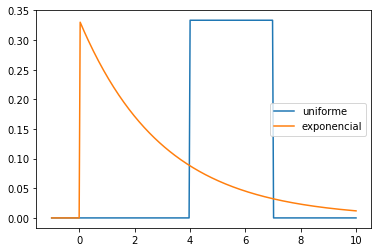

In [5]:
plt.plot(eixo_x, pdf_unif, label="uniforme")
plt.plot(eixo_x, pdf_exp, label="exponencial")
plt.legend()


## Programando a função X + Y

Para vermos como ficaria a função $X + Y$, devemos:
* Obter uma amostra de X
* Obter uma amostra de Y
* Somar ambas as amostras

No `scipy.stats`, a função que gera uma amostra conforme uma distribuição é a `rvs()`. Por exemplo, `uniform.rvs()` ou `expon.rvs`

Desta forma, vamos programar $Z = X + Y$

In [6]:
n = 50000
amostras = []

for i in range(n):
    x = uniform.rvs(loc=loc_unif, scale=scale_unif)
    y = expon.rvs(scale=scale_exp)
    z = x + y
    amostras.append(z)


Dependendo das distribuições somadas, a fórmula da distribuição resultante é conhecida. 

Agora vamos proceder de forma empírica e visualizar apenas o histograma do resultado, que deve lembrar o formato da distribuição resultante.

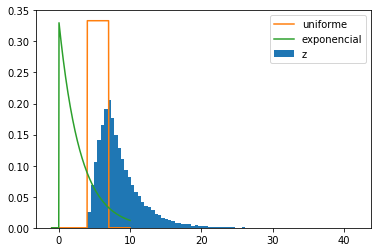

In [7]:
plt.hist(amostras, label="z", bins=80, density=True)
plt.plot(eixo_x, pdf_unif, label="uniforme")
plt.plot(eixo_x, pdf_exp, label="exponencial")
plt.legend()

Pontos importantes: Implementar $X+Y$ é somar uma amostra de $X$ com uma amostra de $Y$ e obter uma nova distribuição, cuja área vai valer $1$

## Melhorando a performance

Ao invés de fazer o *loop* para gerar $n$ amostrar em Python, podemos já pedir à função `rvs()` que realize $n$ sorteios. 

In [8]:
x_ = uniform.rvs(loc=loc_unif, scale=scale_unif, size=n)
y_ = expon.rvs(scale=scale_exp, size=n)
z_ = x_ + y_ # note que estamos somando elemento a elemento de x_ e y_ e obtendo um novo array

Observe que o resultado não se altera, mas o desempenho é melhor

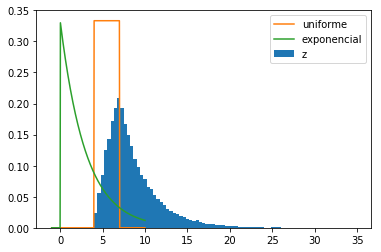

In [9]:
plt.hist(z_, label="z", bins=80, density=True)
plt.plot(eixo_x, pdf_unif, label="uniforme")
plt.plot(eixo_x, pdf_exp, label="exponencial")
plt.legend()

### Variância da Z gerada

In [10]:
np.var(z_, ddof=0) # o denominador da variância tem um termo (n - ddof).

9.901600477835368

### Valor esperado da Z gerada

In [11]:
np.mean(z_)

8.520138720140535

## Contrastando com previsão teórica


** Previsão teórica de E(X)  + E(Y)**

Para a uniforme temos:

$E(X) = \frac{a + b}{2} = 5.5$

Para a exponencial temos:

$E(Y) = \mu = 3$

Portanto, $E(Z) = E(X + Y) = 8.5$


** Previsão teórica de $Var(Z)$ **

Temos, para $X$ que é uniforme:

$$ \sigma^2_X = E(X^2) - \mu_X^2 = \frac{b^2+ab+a^2}{3} - (\frac{a+b}{2})^2 = \frac{(b-a)^2}{12} = 0.75$$

Para a exponencial temos:

$\sigma^2_Y = \mu_Y^2 = 9$

Portanto, $Var(Z) = Var(X) + Var(Y)= \sigma_X^2 + \sigma_Y^2 =  9.75$ 

Os valores ficarm bem próximos da previsão teórica

## Atividades

### Exercício 1

Sejam $X \sim Exp(\mu=10)$ e $Y = \sim Exp(\mu=20)$.  

Vamos definir a variável aleatória $Z$ como $Z = 2X + 3Y$

Responda:

**a.** Qual deve ser $E(Z)$ e $Var(Z)$? Responda usando a teoria

**b.** Verifique, através de simulação, o resultado anterior.  Não se esqueça de apresentar os valores de $E(Z)$ e $Var(Z)$ obtidos a partir dos dados

** Exercício 2**

Dadas duas normais $X$ e $Y$, com médias de 100 e 150, e desvios padrão de 30 e 40, respectivamente:

**a** Quais seriam $E(X + Y)$ e $V(X + Y)$ conforme a teoria? Que formato teria a distribuição?

**b** Simule este resultado.



** Exercício 3**

Os arquivos [var1.csv](var1.csv) e [var2.csv](var2.csv) contém amostras correlacionadas de duas variáveis aleatórias não independentes $X$ e $Y$.

Dados:

$\mu_X = 20$

$\mu_Y = 25$

$\sigma_X^2 = 25$

$\sigma_Y^2 = 16$

$Cov(X,Y) = 0.5$


Faça:
* Calcule a média e o desvio padrão de Z = X + Y usando a teoria
* verifique nos dados se o resultado é coerente
